In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import keras
import pandas as pd
import numpy as np
import cv2
import os
from random import shuffle
from tqdm import tqdm
import scipy
import skimage
from skimage.transform import resize

Using TensorFlow backend.


In [ ]:
train_dir = "/content/drive/My Drive/Colab Notebooks/chest_xray/train/"
test_dir = "/content/drive/My Drive/Colab Notebooks/chest_xray/test/"
val_dir = "/content/drive/My Drive/Colab Notebooks/chest_xray/val/"

In [ ]:
from keras import models
from keras import layers

In [ ]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
                 include_top = False,
                 input_shape = (150, 150, 3))

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dropout(rate=1- 0.7))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dropout(rate = 1-0.7))
model.add(layers.Dense(1, activation = 'sigmoid'))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                16448     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [ ]:
conv_base.trainable = False

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                16448     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [ ]:
from keras import optimizers
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [ ]:
batch_size = 50
IMG_SHAPE = 150

In [ ]:
img_dims = 150
input_path = '/content/drive/My Drive/Colab Notebooks/chest_xray/'
import matplotlib.pyplot as plt

test_data = []
test_labels = []

for cond in ['/NORMAL/', '/PNEUMONIA/']:
  for img in (os.listdir(input_path + 'test' + cond)):
    
    
    img = plt.imread(input_path+'test'+cond+img)
    img = cv2.resize(img, (img_dims, img_dims))
    img = np.dstack([img, img, img])
    img = img.astype('float32') / 255
    if cond=='/NORMAL/':
      label = 0
    elif cond=='/PNEUMONIA/':
      label = 1
    test_data.append(img)
    test_labels.append(label)
        
test_data = np.array(test_data)
test_labels = np.array(test_labels)

In [ ]:
image_gen = ImageDataGenerator(rescale = 1./255, 
                               horizontal_flip = True,
                              rotation_range=5,
                              width_shift_range= 0.10,
                              height_shift_range= 0.05,
                              zoom_range = 0.15,
                              shear_range = 0.1,
                              vertical_flip = False,
                              fill_mode = 'reflect')

train_data_gen = image_gen.flow_from_directory(batch_size = batch_size,
                                               directory= train_dir,
                                               shuffle=True,
                                                target_size=(IMG_SHAPE,IMG_SHAPE),
                                                class_mode='binary'
                                                              )

Found 5216 images belonging to 2 classes.


In [ ]:
image_val_gen = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen.flow_from_directory(batch_size = batch_size,
                                                directory = val_dir,
                                                target_size=(IMG_SHAPE,IMG_SHAPE),
                                                class_mode='binary'
                                                              )

Found 16 images belonging to 2 classes.


In [ ]:
image_test_gen = ImageDataGenerator(rescale= 1./255)

test_data_gen = image_val_gen.flow_from_directory(batch_size = batch_size,
                                                directory = test_dir,
                                                target_size=(IMG_SHAPE,IMG_SHAPE),
                                                class_mode='binary'
                                                              )

Found 624 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(train_data_gen,
                                steps_per_epoch= 50,
                                epochs = 15,
                                 validation_data = test_data_gen,
                                 validation_steps =40)



Epoch 1/15
50/50 [==============================] - 795s 16s/step - loss: 0.3199 - acc: 0.8575 - val_loss: 0.3275 - val_acc: 0.8543
Epoch 2/15
50/50 [==============================] - 776s 16s/step - loss: 0.1752 - acc: 0.9360 - val_loss: 0.3502 - val_acc: 0.8892
Epoch 3/15
50/50 [==============================] - 129s 3s/step - loss: 0.1864 - acc: 0.9328 - val_loss: 0.3430 - val_acc: 0.8913
Epoch 4/15
50/50 [==============================] - 63s 1s/step - loss: 0.1491 - acc: 0.9416 - val_loss: 0.2493 - val_acc: 0.9027
Epoch 5/15
50/50 [==============================] - 65s 1s/step - loss: 0.1401 - acc: 0.9440 - val_loss: 0.2703 - val_acc: 0.9053
Epoch 6/15
50/50 [==============================] - 64s 1s/step - loss: 0.1409 - acc: 0.9472 - val_loss: 0.3354 - val_acc: 0.8746
Epoch 7/15
50/50 [==============================] - 64s 1s/step - loss: 0.1367 - acc: 0.9424 - val_loss: 0.3004 - val_acc: 0.8907
Epoch 8/15
50/50 [==============================] - 65s 1s/step - loss: 0.1213 - ac

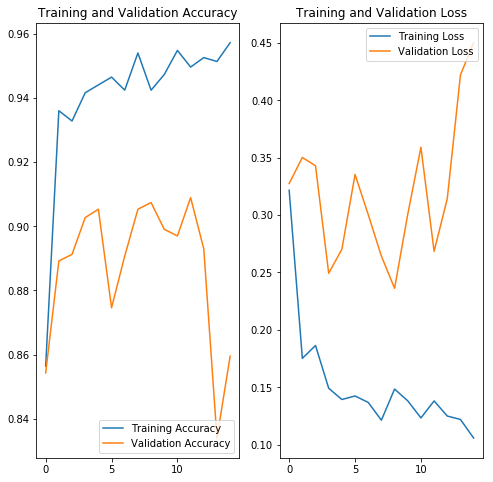

In [ ]:
import matplotlib.pyplot as plt

epochs =15
acc = history.history['acc']
loss = history.history['loss']

val_acc = history.history['val_acc']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

preds = model.predict(test_data)

acc = accuracy_score(test_labels, np.round(preds))*100
cm = confusion_matrix(test_labels, np.round(preds))
tn, fp, fn, tp = cm.ravel()

print('CONFUSION MATRIX ------------------')
print(cm)

print('\nTEST METRICS ----------------------')
precision = tp/(tp+fp)*100
recall = tp/(tp+fn)*100
print('Accuracy: {}%'.format(acc))
print('Precision: {}%'.format(precision))
print('Recall: {}%'.format(recall))
print('F1-score: {}'.format(2*precision*recall/(precision+recall)))

CONFUSION MATRIX ------------------
[[151  83]
 [  5 385]]

TEST METRICS ----------------------
Accuracy: 85.8974358974359%
Precision: 82.26495726495726%
Recall: 98.71794871794873%
F1-score: 89.74358974358974


In [ ]:
image_test_gen = ImageDataGenerator(rescale= 1./255)

test_data_gen = image_val_gen.flow_from_directory(batch_size = batch_size,
                                                directory = test_dir,
                                                target_size=(IMG_SHAPE,IMG_SHAPE),
                                                class_mode='binary'
                                                              )

Found 624 images belonging to 2 classes.


In [ ]:
scores = model.evaluate_generator(test_data_gen)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


acc: 86.06%


In [ ]:
import numpy
test_steps_per_epoch = numpy.math.ceil(test_data_gen.samples / test_data_gen.batch_size)

predictions = model.predict_generator(test_data_gen, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = numpy.argmax(predictions, axis=1)



##Get ground-truth classes and class-labels



true_classes = test_data_gen.classes
class_labels = list(test_data_gen.class_indices.keys())   


##Use scikit-learn to get statistics
import sklearn.metrics as metrics

report = metrics.confusion_matrix(true_classes, predicted_classes, target_names=class_labels)
print(report) 

TypeError: ignored

In [ ]:
from sklearn.metrics import confusion_matrix
report = confusion_matrix(true_classes, predicted_classes)


In [ ]:
print(report)